In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

In [2]:
path = r'/Users/buketoztekin/Documents/Instacart Basket Analysis/'
file_path = os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_combined_merged_derived.pkl')
ords_prods_merge = pd.read_pickle(file_path)


In [3]:
ords_prods_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_spending,spender_flag,purchase_frequency,frequency_flag
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,28,6,11,...,Mid-range product,Regularly busy,Regularly busy,Most orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,30,6,17,...,Mid-range product,Regularly busy,Regularly busy,Average orders,32,Regular customer,6.935811,Low spender,8.0,Frequent customer
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,2,0,21,...,Mid-range product,Busiest day,Busiest days,Average orders,5,New customer,7.930208,Low spender,7.0,Frequent customer
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,1,3,13,...,Mid-range product,Regularly busy,Slowest days,Most orders,3,New customer,4.972414,Low spender,9.0,Frequent customer
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,3,4,17,...,Mid-range product,Least busy,Slowest days,Average orders,3,New customer,4.972414,Low spender,9.0,Frequent customer


<Axes: xlabel='order_day_of_week'>

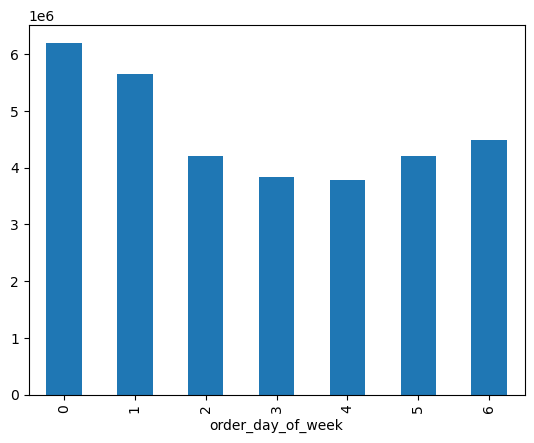

In [4]:
ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()


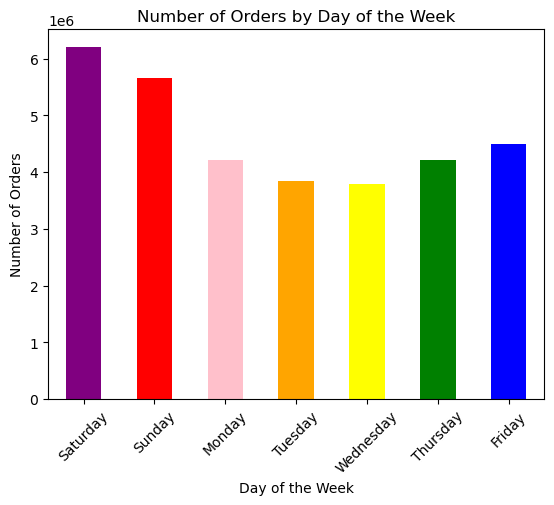

In [5]:
# Aggregate the data by order_day_of_week and count the occurrences
day_counts = ords_prods_merge['order_day_of_week'].value_counts().sort_index()

# Create the bar chart
bar = day_counts.plot.bar(color=['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

# Customize the x-axis and y-axis titles
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')

# Add a title to the chart
plt.title('Number of Orders by Day of the Week')

# Rotate the x-axis labels and set custom labels for the days of the week
day_labels = {0: 'Saturday', 1: 'Sunday', 2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'}
plt.xticks(ticks=day_counts.index, labels=[day_labels[i] for i in day_counts.index], rotation=45)

# Save the plot as an image file
#Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'number_of_orders_by_day.png'), bbox_inches = 'tight')
# Display the plot
plt.show()

In [6]:
path = r'/Users/buketoztekin/Documents/Instacart Basket Analysis/'

In [7]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<Axes: ylabel='Frequency'>

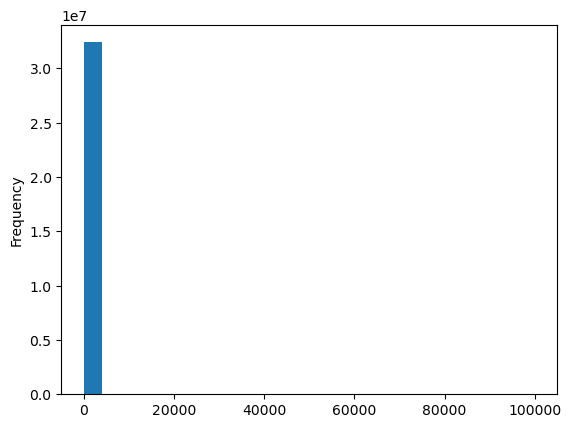

In [8]:
ords_prods_merge['prices'].plot.hist(bins = 25)


In [9]:
ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan


In [10]:
ords_prods_merge['prices'].max()

25.0

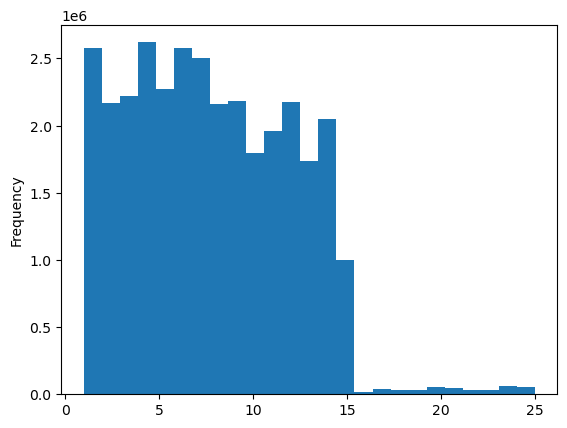

In [11]:
hist=ords_prods_merge['prices'].plot.hist(bins = 25)


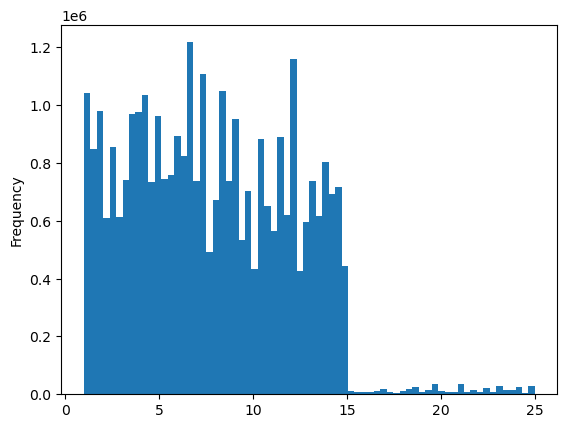

In [12]:
hist_2=ords_prods_merge['prices'].plot.hist(bins = 70)


In [13]:
df = ords_prods_merge[:2000000]


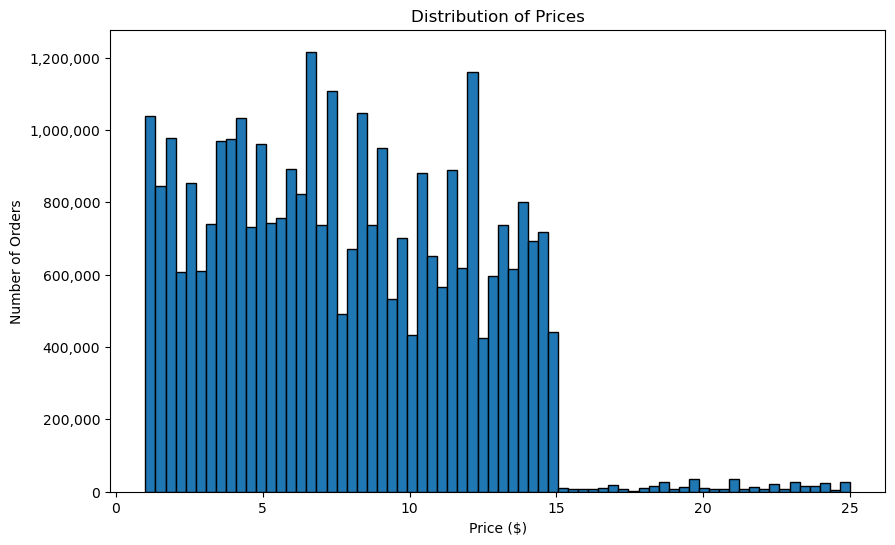

In [16]:
# Plotting the histogram
hist_3 = ords_prods_merge['prices'].plot.hist(bins=70, edgecolor='black', figsize=(10, 6))

# Add x-axis label
plt.xlabel('Price ($)')

# Define a function to format the y-axis tick labels
def format_thousands(x, pos):
    return f'{int(x):,}'

# Apply the formatter to the y-axis
hist_3.yaxis.set_major_formatter(FuncFormatter(format_thousands))

# Adding title and labels
plt.title('Distribution of Prices')
plt.xlabel('Price ($)')
plt.ylabel('Number of Orders')

#Save the histogram
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'distribution_of_prices.png'), bbox_inches = 'tight')

# Display the plot
plt.show()